In [1]:
!ls '/n/holylfs/LABS/wadduwage_lab/Lab/navodini/dCNN_Datasets/VesSAPSyn_BV/2SLS'

mouse_bv_100um_data_2sls_5.603172e+01mc17-Oct-2021 05:28:57_pram_plusplus.mat
mouse_bv_100um_data_2sls_5.603172e+01mc17-Oct-2021 06:02:28_pram_plusplus.mat
mouse_bv_100um_data_2sls_5.603172e+01mcanml1_r1_100um_exp.h5
mouse_bv_100um_data_2sls_5.603172e+01mcanml1_r2_100um_exp.h5
mouse_bv_100um_data_2sls_5.603172e+01mcanml2_r1_100um_exp.h5
mouse_bv_100um_data_2sls_5.603172e+01mc_test.h5
mouse_bv_100um_data_2sls_5.603172e+01mc_tr.h5


In [28]:
!ls '/n/holylfs/LABS/wadduwage_lab/Lab/navodini/FwdModel_matlab/_datasets/BV_03102021.mat'

/n/holylfs/LABS/wadduwage_lab/Lab/navodini/FwdModel_matlab/_datasets/BV_03102021.mat


In [29]:
import h5py
import numpy as np

f = h5py.File('/n/holylfs/LABS/wadduwage_lab/Lab/navodini/FwdModel_matlab/_datasets/BV_03102021.mat', 'r')

In [30]:
list(f.keys())

['#refs#', 'Data']

In [31]:
list(f['#refs#'])
np.array(f['#refs#']['a'])

array([0, 0], dtype=uint64)

In [32]:
print(list(f['Data']))
print(f['Data']['cell'],'  *******  ', f['Data']['pram'])
print(list(f['Data']['pram']))

dx = np.array(f['Data']['pram']['dx'])
dataset = np.array(f['Data']['cell'])

['cell', 'pram']
<HDF5 dataset "cell": shape (772, 512, 512), type "|u1">   *******   <HDF5 group "/Data/pram" (1 members)>
['dx']


In [7]:
dataset.shape

(772, 512, 512)

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import torch
import cv2

plt.figure(figsize= (40, 40))
grid_img= torchvision.utils.make_grid(torch.from_numpy(dataset[:625]).unsqueeze(dim= 1), nrow= 25, pad_value= 255).permute(1,2,0)
grid_img= cv2.cvtColor(grid_img.numpy(), cv2.COLOR_RGB2GRAY)
plt.imshow(grid_img)

In [41]:
import os, shutil
import matplotlib.pyplot as plt
import cv2


In [42]:
def crop_running_window(slice_, slice_num, skip= 10, window_size= 256, save_dir= None):
    len_slice= slice_.shape[0]
    all_cropped= []
    for x in range(0, len_slice- window_size, skip):
        for y in range(0, len_slice- window_size, skip):
            cropped = slice_[x:x+window_size, y:y+window_size]
            all_cropped.append(cropped)
            if save_dir!=None:
                save_name= f'{save_dir}/{slice_num}_x{x}_y{y}.png'
                cv2.imwrite(save_name , cropped)
                #plt.imsave(save_name, cropped)
    return np.array(all_cropped)

In [43]:
def create_images(dataset, start_slice, end_slice, skip= 32, window_size= 256, save_dir= None):
    try:
        shutil.rmtree(save_dir)
        print(f'deteted : {save_dir}')
    except:pass

    os.mkdir(save_dir)
    for slice_num in range(start_slice, end_slice, 10):
        print(f'{save_dir} --> generating images from slice : {slice_num}')
        slice_= dataset[slice_num]
        images= crop_running_window(slice_, slice_num, skip= skip, window_size= window_size, save_dir= save_dir)

In [44]:
!mkdir './test_save'

mkdir: cannot create directory ‘./test_save’: File exists


In [45]:
# train: 0, 620 | test: 620, 690 | val: 690, 780
save_dir= './test_save/val'
create_images(dataset, start_slice= 700, end_slice= 780, skip= 64, window_size= 256, save_dir= save_dir)

deteted : ./test_save/val
./test_save/val --> generating images from slice : 700
./test_save/val --> generating images from slice : 710
./test_save/val --> generating images from slice : 720
./test_save/val --> generating images from slice : 730
./test_save/val --> generating images from slice : 740
./test_save/val --> generating images from slice : 750
./test_save/val --> generating images from slice : 760
./test_save/val --> generating images from slice : 770


In [49]:
#!rm -rf /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular
!mkdir /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular

In [50]:
# train: 0, 620 | test: 620, 690 | val: 690, 780

save_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train'
create_images(dataset, start_slice= 0, end_slice= 620, skip= 16, window_size= 256, save_dir= save_dir)

save_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/val'
create_images(dataset, start_slice= 700, end_slice= 780, skip= 64, window_size= 256, save_dir= save_dir)

save_dir= '/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/test'
create_images(dataset, start_slice= 620, end_slice= 700, skip= 64, window_size= 256, save_dir= save_dir)

/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 0
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 10
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 20
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 30
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 40
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 50
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 60
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 70
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train --> generating images from slice : 80
/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/dat

In [51]:
len(os.listdir('/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/test'))

128

## Creating Datasets, DataLoaders

In [52]:
import os, shutil

import torch
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from PIL import Image
import glob
import random
import h5py

import torchvision
import torch
import matplotlib.pyplot as plt
from modules.data_utils import *


In [53]:
import sys
sys.path.append('..')


In [106]:
class vascular_v1_getdataset(torch.utils.data.Dataset):
    def __init__(self, img_size= 32, type_= 'train', delta=0, img_dir= None, num_samples= None):
        super(vascular_v1_getdataset, self).__init__()
        
        self.type_ = type_
        
        img_list = sorted(glob.glob(f"{img_dir}/{self.type_}/*.png"))
        print(f'total images found in: {img_dir}/{self.type_} -> {len(img_list)}')
        
        if num_samples==None:num_samples=len(img_list)
            
        if len(img_list)<num_samples:
            print(f'WARNING -> Dataset: len(images) < num_samples -> num_samples will be neglected !!!')
            self.img_list= img_list
        else:
            self.img_list= img_list[:num_samples]
        
        self.delta= delta
        
        self.mean =-self.delta/(1-self.delta)
        self.std=1/(1-self.delta)
        
        if self.type_ == 'train':
            self.transform = torchvision.transforms.Compose([
                                    torchvision.transforms.Resize([img_size, img_size]),
                                    torchvision.transforms.RandomResizedCrop(size= img_size, scale=(0.5, 1.0), ratio=(0.75, 1.33)),
                                    torchvision.transforms.RandomHorizontalFlip(),
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((self.mean,), (self.std,))])
        else:
            self.transform = torchvision.transforms.Compose([
                                    torchvision.transforms.Resize([img_size, img_size]),
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((self.mean,), (self.std,))])
    
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, idx):
        output = self.transform(Image.fromarray((255*plt.imread(self.img_list[idx])).astype('uint8'))), torch.tensor(1) 
        return output

In [107]:
def vascular_v1(img_size, delta, num_samples_train): ## murats dataset
    data_dir= "/n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular"
    
    trainset = vascular_v1_getdataset(img_size, 'train', delta, data_dir, num_samples_train)
    valset= vascular_v1_getdataset(img_size, 'val', delta, data_dir)
    testset= vascular_v1_getdataset(img_size, 'test', delta, data_dir)
    
    return trainset, valset, testset

In [108]:
def return_dataloaders(trainset, valset, testset, batch_size_train= 32, drop_last_val_test= False):
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=False, drop_last= True)
    val_loader = torch.utils.data.DataLoader(valset, batch_size=25, shuffle=False, drop_last= drop_last_val_test) # batch_sizes fixed
    test_loader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=False, drop_last= drop_last_val_test) # batch_sizes fixed
    
    return train_loader, val_loader, test_loader

total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train -> 15872
total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/val -> 128
total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/test -> 128


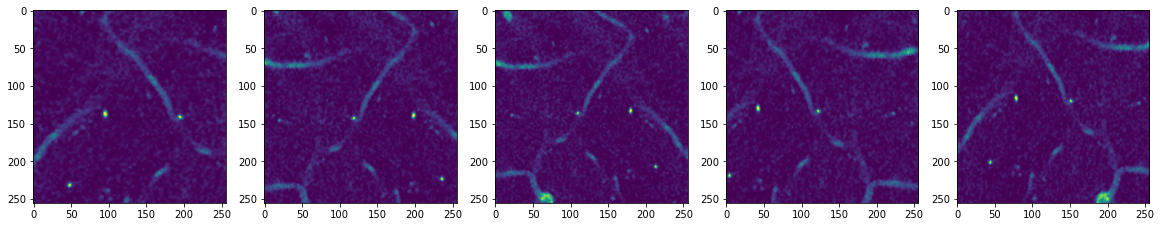

In [113]:
img_size= 256
delta= 0.0001
num_samples_train= 2000
batch_size_train= 32

trainset, valset, testset = vascular_v1(img_size= img_size, delta= delta, num_samples_train= num_samples_train)

drop_last_val_test= True

plt.figure(figsize= (20, 5))
for _ in range(5):
    train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= batch_size_train, drop_last_val_test= drop_last_val_test)
    x, y= next(iter(train_loader))
    plt.subplot(1,5, _+1)
    plt.imshow(x[12,0])
plt.show()

total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train -> 15872
total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/val -> 128
total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/test -> 128


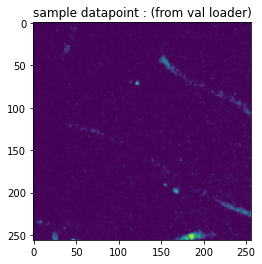

dataset value range :  0.011863529682159424 1.0


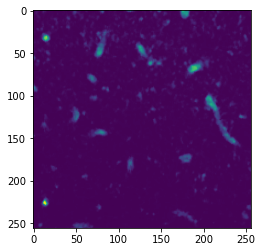

In [114]:
from modules.data_utils import return_dataloaders

img_size= 256
delta= 0.0001
num_samples_train= 2000
batch_size_train= 32

trainset, valset, testset = vascular_v1(img_size= img_size, delta= delta, num_samples_train= num_samples_train)

drop_last_val_test= True

train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= batch_size_train, drop_last_val_test= drop_last_val_test)
x, y= next(iter(train_loader))
plt.imshow(x[12,0])

## Check Loading From Scripts

total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/train -> 15872
total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/val -> 128
total images found in: /n/holylfs/LABS/wadduwage_lab/Lab/uom_Udith/datasets/vascular/test -> 128


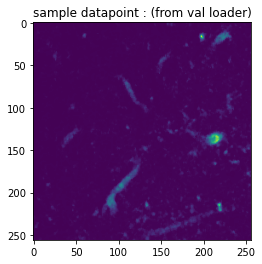

dataset value range :  0.003922564908862114 1.0


In [8]:
import sys
sys.path.append('../')

from modules.datasets import *
from modules.data_utils import return_dataloaders

get_dataset_func= vascular_v1

img_size= 256
delta= 0.000001
num_samples_train= 10000
batch_size_train= 32

trainset, valset, testset = get_dataset_func(img_size= img_size, delta= delta, num_samples_train= num_samples_train)
train_loader, val_loader, test_loader = return_dataloaders(trainset, valset, testset, batch_size_train= batch_size_train)


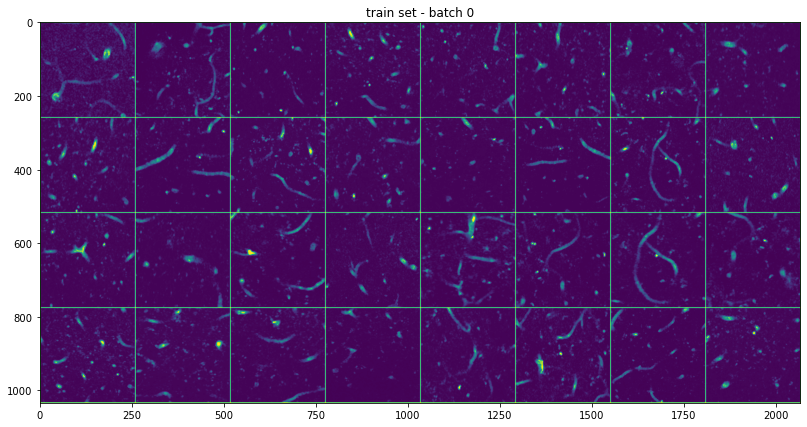

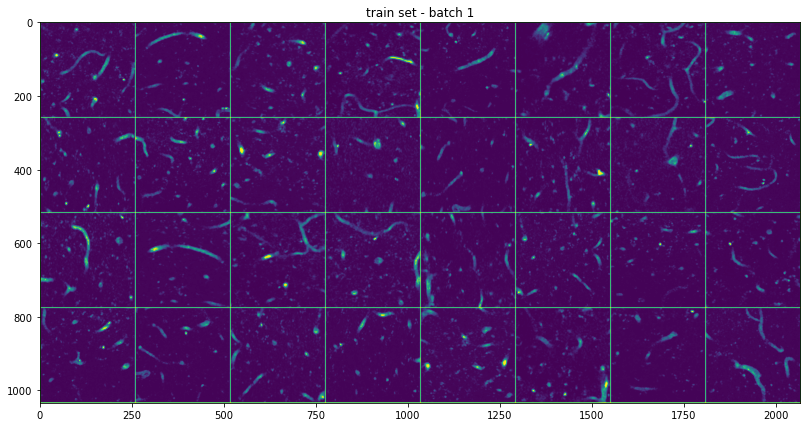

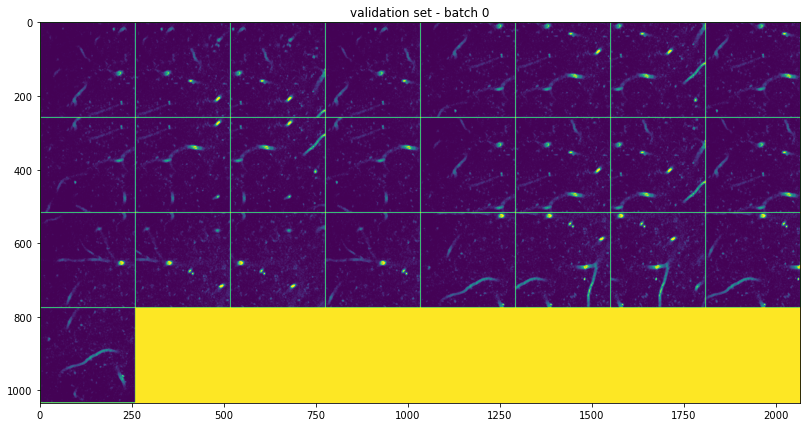

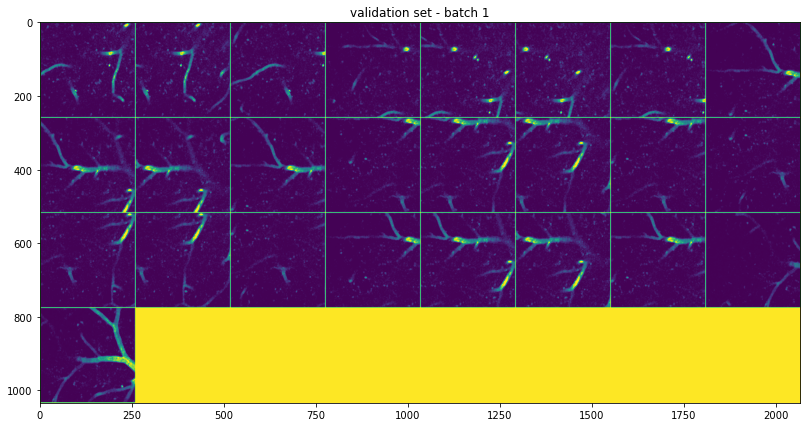

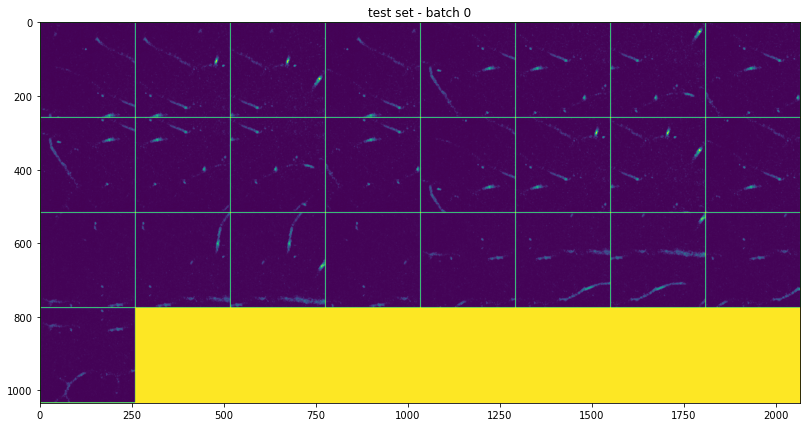

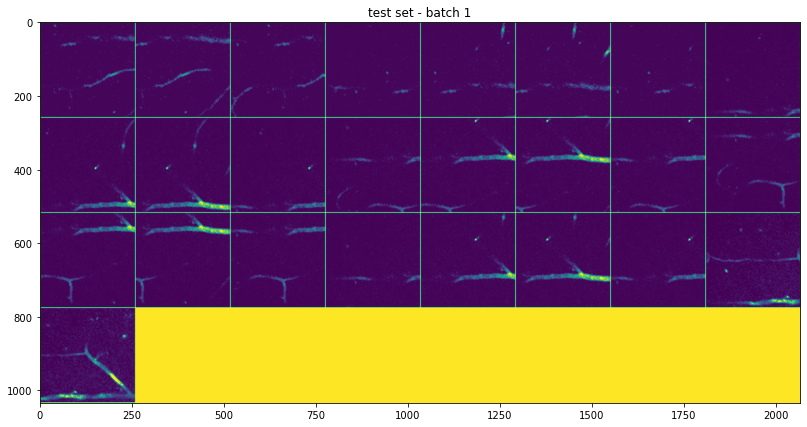

In [9]:
import cv2
for idx, (x, y) in enumerate(train_loader):
    if idx > 1:break
    #print(x.shape, y)
    grid_img = torchvision.utils.make_grid(x, nrow=8, pad_value= 1.0)
    plt.figure(figsize= (15, 7))
    plt.imshow(cv2.cvtColor(grid_img.permute(1,2,0).numpy(), cv2.COLOR_RGB2GRAY))
    plt.title(f'train set - batch {idx}')
    plt.show()
    
for idx, (x, y) in enumerate(val_loader):
    if idx > 1:break
    #print(x.shape, y)
    grid_img = torchvision.utils.make_grid(x, nrow=8, pad_value= 1.0)
    plt.figure(figsize= (15, 7))
    plt.imshow(cv2.cvtColor(grid_img.permute(1,2,0).numpy(), cv2.COLOR_RGB2GRAY))
    plt.title(f'validation set - batch {idx}')
    plt.show()
    
import cv2

for idx, (x, y) in enumerate(test_loader):
    if idx > 1:break
    #print(x.shape, y)
    grid_img = torchvision.utils.make_grid(x, nrow=8, pad_value= 1.0)
    plt.figure(figsize= (15, 7))
    plt.imshow(cv2.cvtColor(grid_img.permute(1,2,0).numpy(), cv2.COLOR_RGB2GRAY))
    plt.title(f'test set - batch {idx}')
    plt.show()